In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


#Creating database connections 

In [4]:
conn = sqlite3.connect ('inventory.db')

#fetching vendor summary data 

In [5]:
df= pd.read_sql_query("select * from vendor_sales_summary" , conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,9578.0,344712.22,64889.97,17598.14,-3466539.38,-1005.632867,0.066019,0.090446
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,9203.0,275162.97,52289.50,16909.12,-3528878.25,-1282.468440,0.056103,0.072334
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,11189.0,288135.11,48202.30,20557.97,-3130168.57,-1086.354443,0.059704,0.084292
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,20226.0,444810.74,43304.31,37163.76,-2816387.20,-633.165287,0.100287,0.136395
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,11883.0,357759.17,52774.51,21833.58,-2665446.84,-745.039419,0.086041,0.118338


Exploratry data analysis
  •Previosly , we examined the various tables in the databse to identify key variable , understand their relationship and determine which ones should be included in the final analysis.
  •in this phase of EDA , we will analyze the resultant table to gain insights the distribution of each column. this will hep us undrstand data patterns identify anamolis asn ensures data quality before proceeding with further analysis

In [15]:
#Summary Statistics :
summary_Statistics = df.describe().T

In [16]:
summary_Statistics

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.0000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00,5793.5000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.8400,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.49,10.9900,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.00,750.0000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.0000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.4575,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,228.887860,871.127723,0.00,0.0000,12.000000,129.250000,2.854400e+04
TotalSalesDollars,10692.0,3089.647773,12181.138259,0.00,0.0000,251.740000,2089.552500,4.448107e+05
TotalSalesPrice,10692.0,1508.300788,3902.425486,0.00,0.0000,125.980000,1220.622500,6.488997e+04


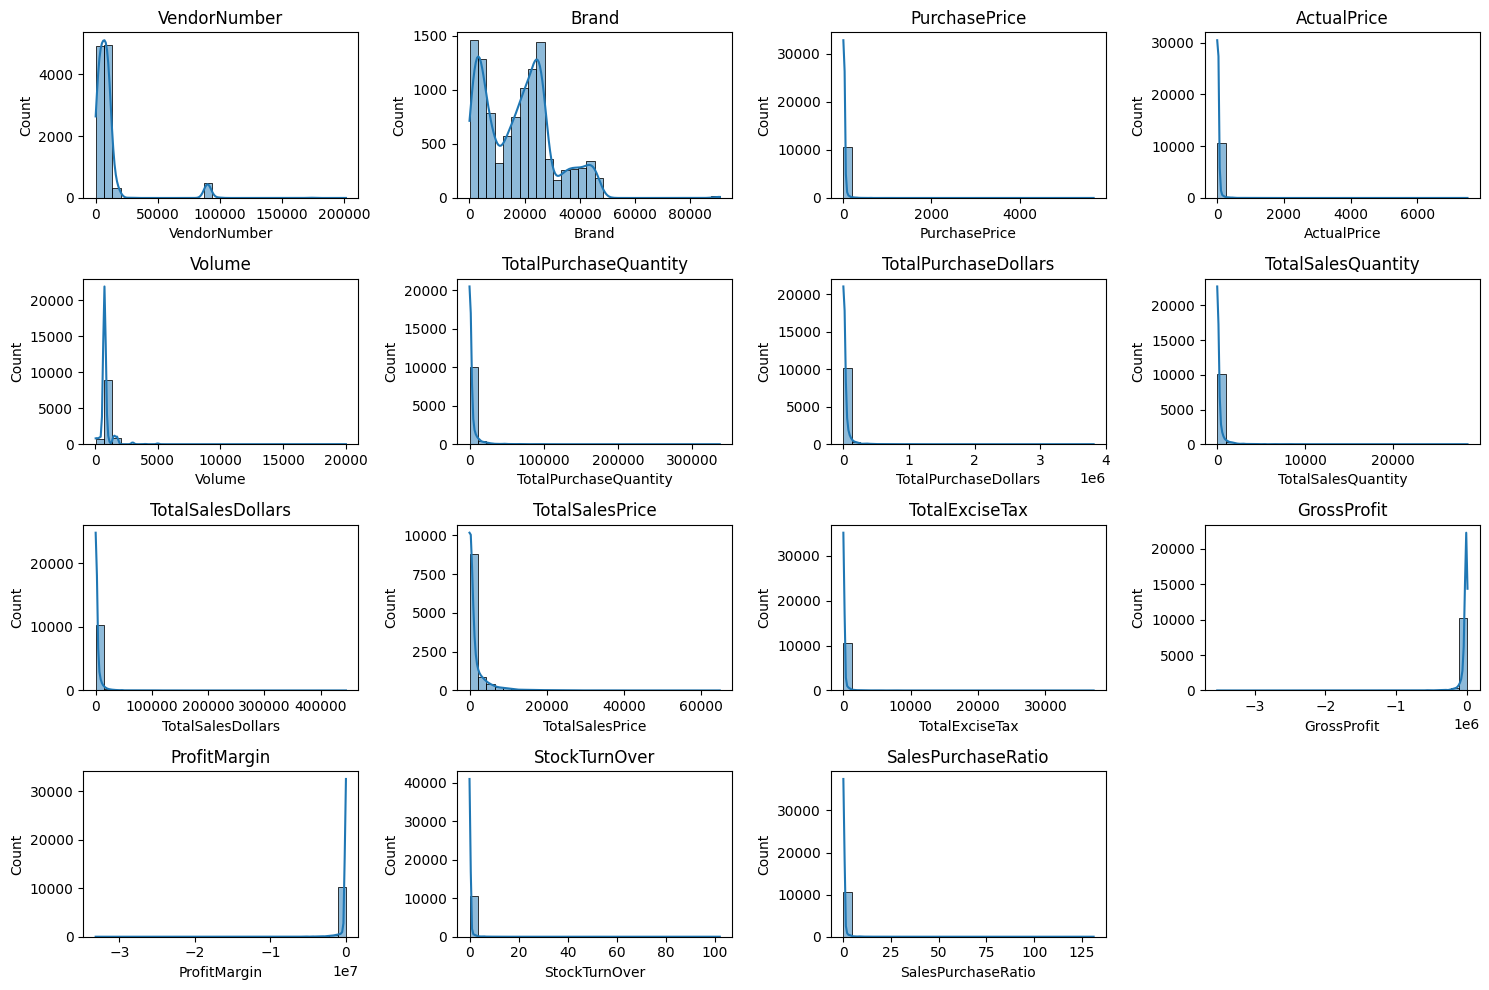

In [18]:
#Distributions plots fro numerical Columns :
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols) :
    plt.subplot(4,4,i+1) # Adjust Grid Layout As Needed
    sns.histplot(df[col], kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

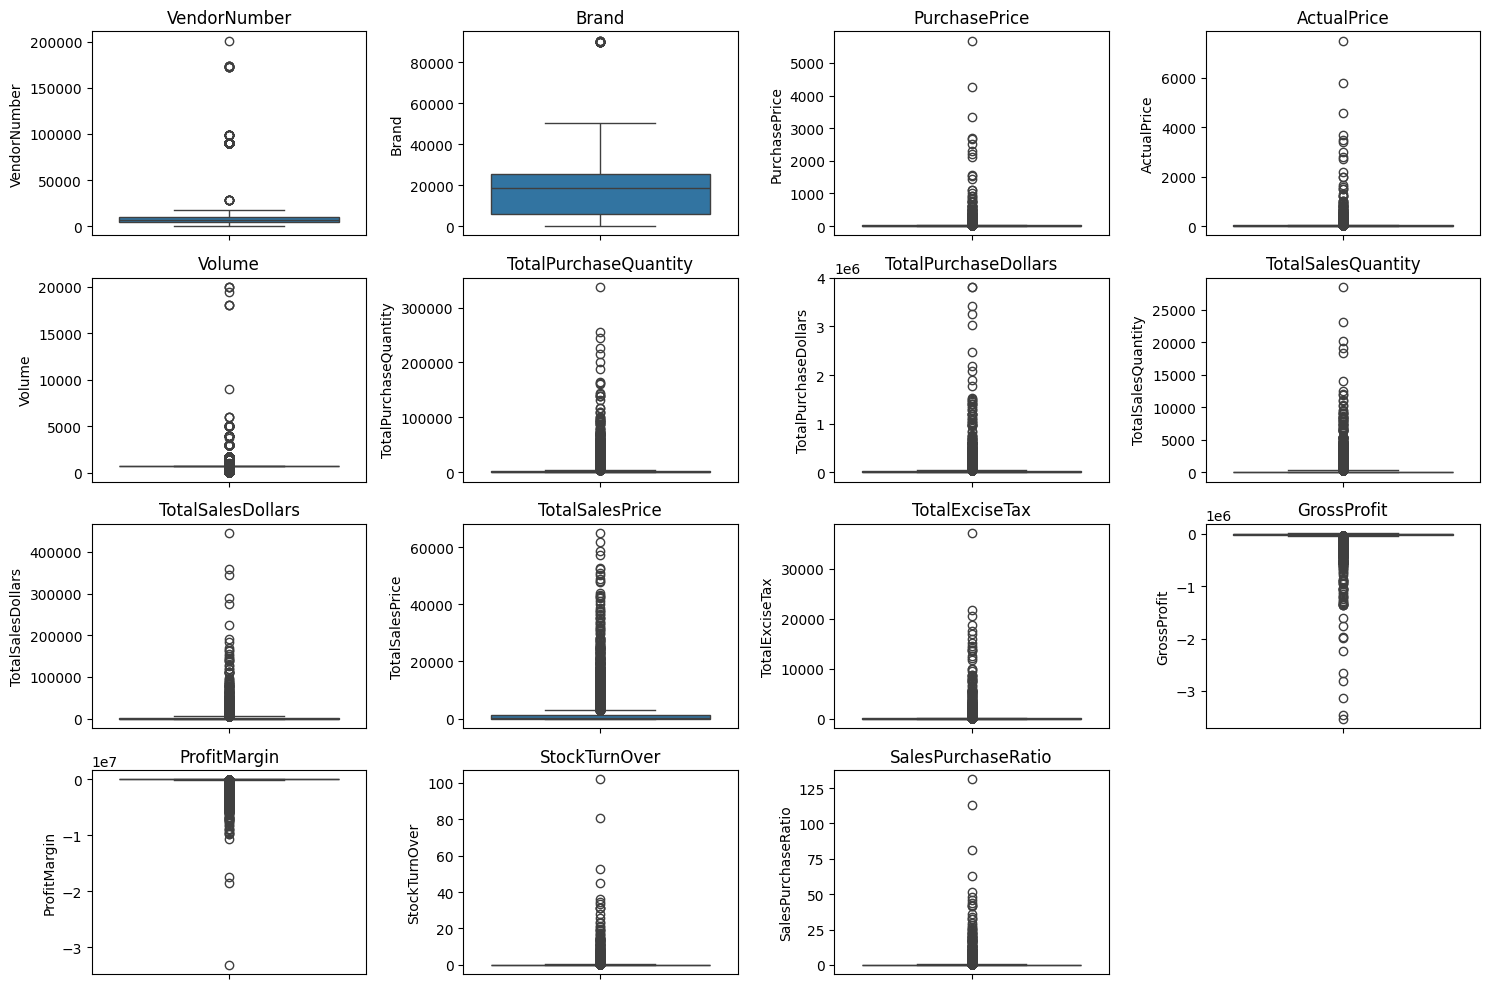

In [19]:
#Outliers ditections with boxPlot
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols) :
    plt.subplot(4,4,i+1) # Adjust Grid Layout As Needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Statistics Insights:
Negative & Zero Values:
Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:
Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.

In [20]:
#lets filter teh data by removing incosnsistency
df= pd.read_sql_query('''SELECT *
                      FROM vendor_sales_summary
                      WHERE GrossProfit > 0
                      AND ProfitMargin > 0
                      AND TotalSalesQuantity > 0 ''' , conn)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,250,24832.50,198.0,29698.02,1199.92,22.24,4865.52,16.383314,0.792000,1.195934
1,9552,M S WALKER INC,23355,Paul Dolan 12 Cab Svgn,9.60,14.49,750.0,1486,14265.60,1151.0,17253.49,5381.41,128.82,2987.89,17.317598,0.774563,1.209447
2,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,846,12529.26,867.0,17331.33,7196.40,683.00,4802.07,27.707452,1.024823,1.383268
3,9165,ULTRA BEVERAGE COMPANY LLP,24379,Madison's Ranch Cab Svgn,8.78,12.99,750.0,1359,11932.02,1909.0,24797.91,6105.30,214.06,12865.89,51.882961,1.404709,2.078266
4,9552,M S WALKER INC,45604,Latour 12 Cuvee Bourg Rouge,13.07,19.99,750.0,830,10848.10,614.0,12273.86,5037.48,68.49,1425.76,11.616232,0.739759,1.131429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,12.0,23.88,1.99,0.63,21.04,88.107203,6.000000,8.408451
677,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,3.33,55.778894,1.500000,2.261364
678,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,60.38,96.269133,21.333333,26.803419
679,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,6.0,11.94,7.96,1.26,10.47,87.688442,6.000000,8.122449


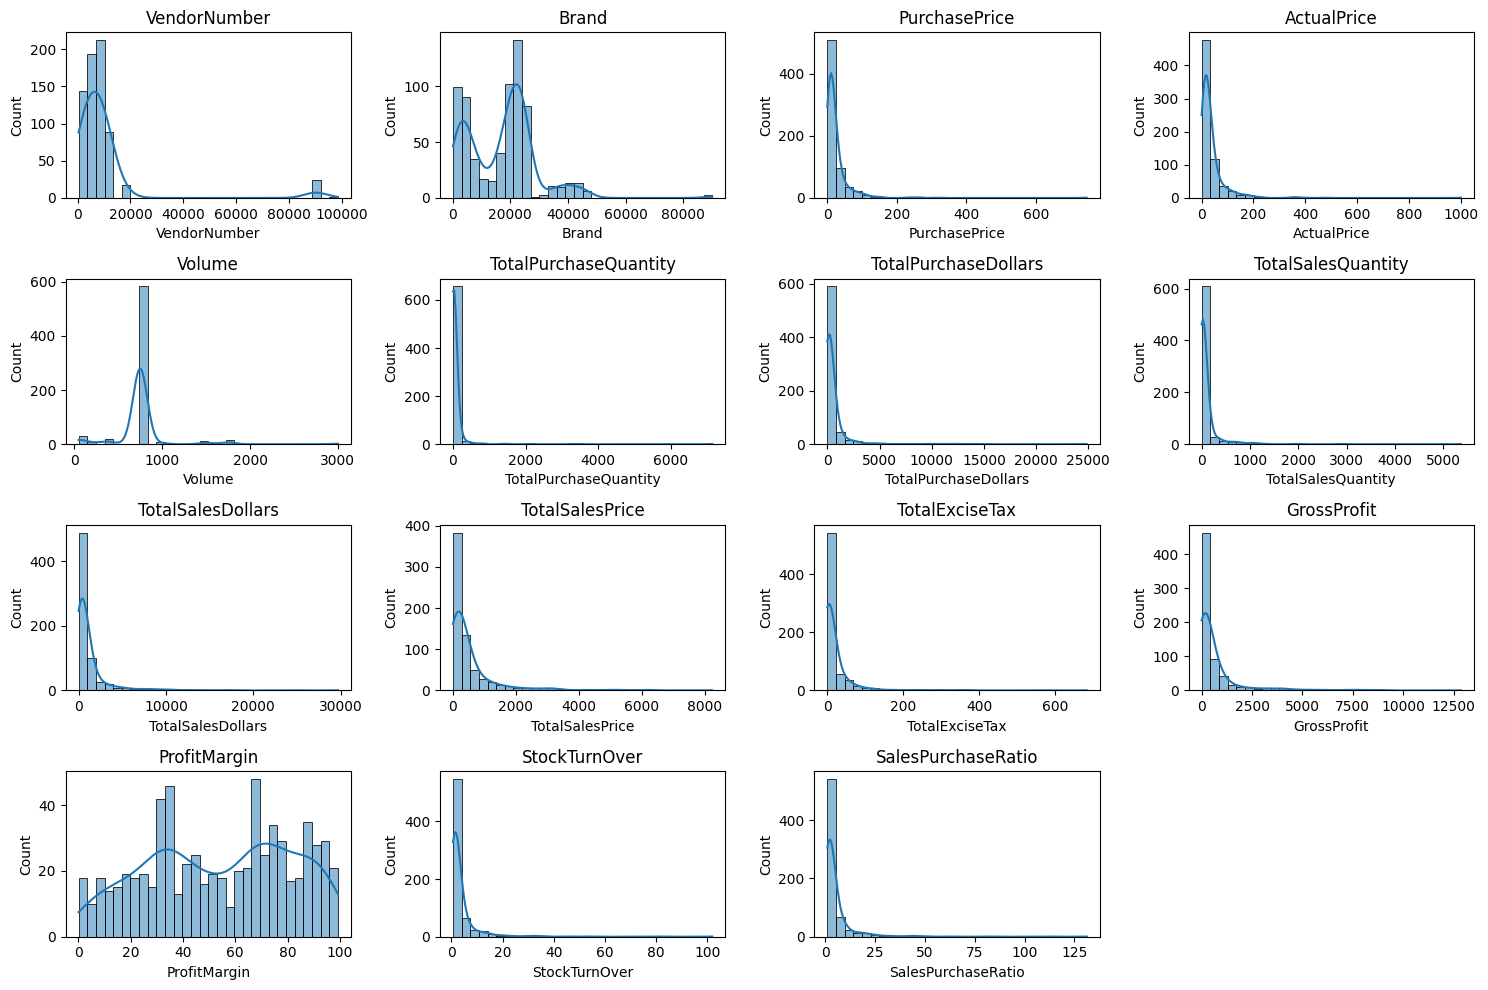

In [21]:
#Distributions plots fro numerical Columns :
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols) :
    plt.subplot(4,4,i+1) # Adjust Grid Layout As Needed
    sns.histplot(df[col], kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

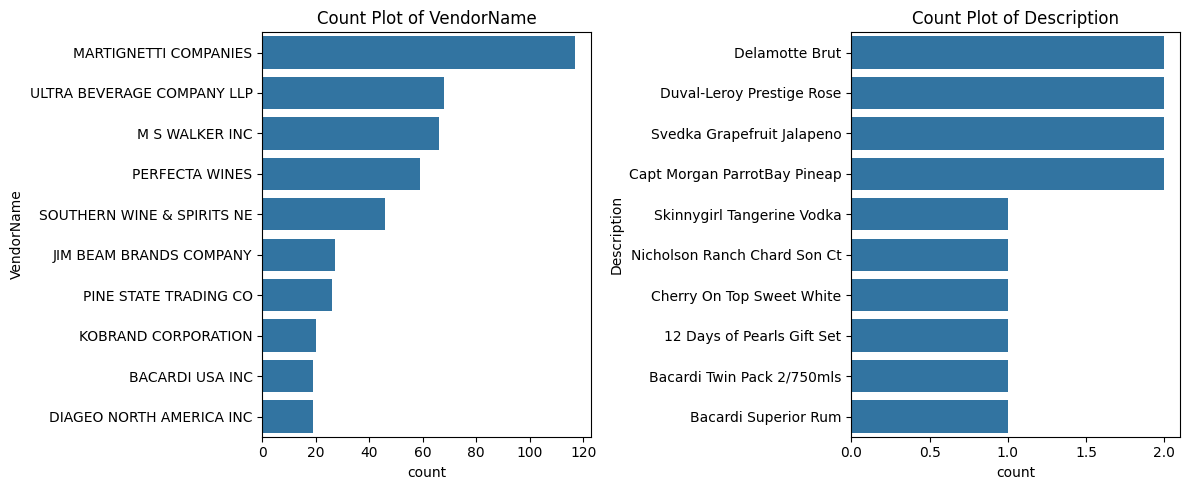

In [22]:
# Count Plots fro Categorial Columns 
Categorical_cols = ["VendorName" , "Description"]
plt.figure(figsize=(12,5))
for i , col in enumerate(Categorical_cols) :
    plt.subplot(1,2,i+1) # Adjust Grid Layout As Needed
    sns.countplot(df[col], order=df[col].value_counts().index[:10]) #Top 10 Categories
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

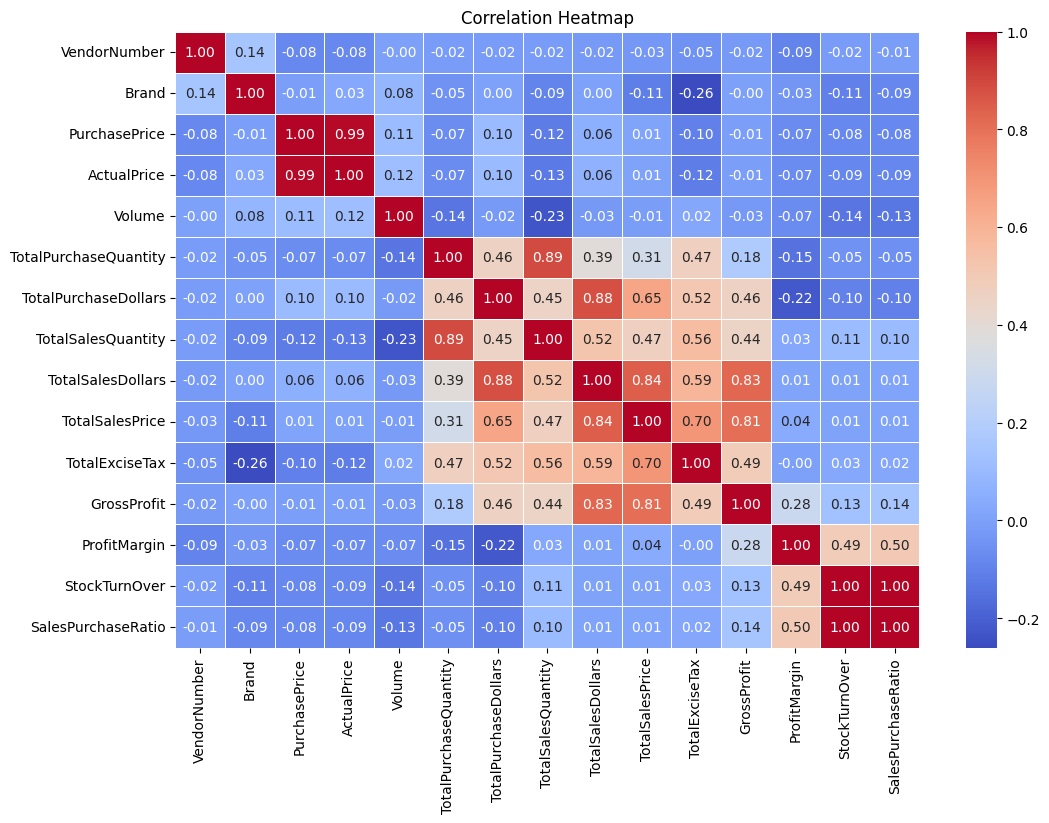

In [23]:
#Correlation Heatmap

plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix ,  annot = True , fmt=".2f" , cmap="coolwarm" , linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Insights
PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability. 

DATA ANALYSIS

Identify the barands needs promotionsla or pricing adustment which exhibit lower sales performance but higher proit margins

In [24]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum' , 
    'ProfitMargin':'mean'}).reset_index()


In [25]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [26]:
low_sales_threshold


np.float64(119.832)

In [27]:
high_margin_threshold

np.float64(87.42082785501476)

In [28]:
#Filter Brands with low sales but high profit margins 
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars']<= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins


,Description,TotalSalesDollars,ProfitMargin
616,The Club Strawbry Margarita,11.94,87.688442
229,Crown Royal Apple,23.88,88.107203
635,Tracia Syrah,44.94,88.495772
46,Bacardi Oakheart Spiced Trav,59.94,87.554221
256,Dr McGillicuddy's Apple Pie,62.72,96.269133
579,St Elder Elderflower Liqueur,66.33,91.436756
31,Aresti Pnt Nr Curico Vly,74.85,95.617902
239,DeKuyper Buttershots Trav,76.93,90.718835
626,Three Olives Grape Vodka,80.19,99.114603
580,St Germain Liqueur,89.94,87.658439


In [29]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # For better visualization

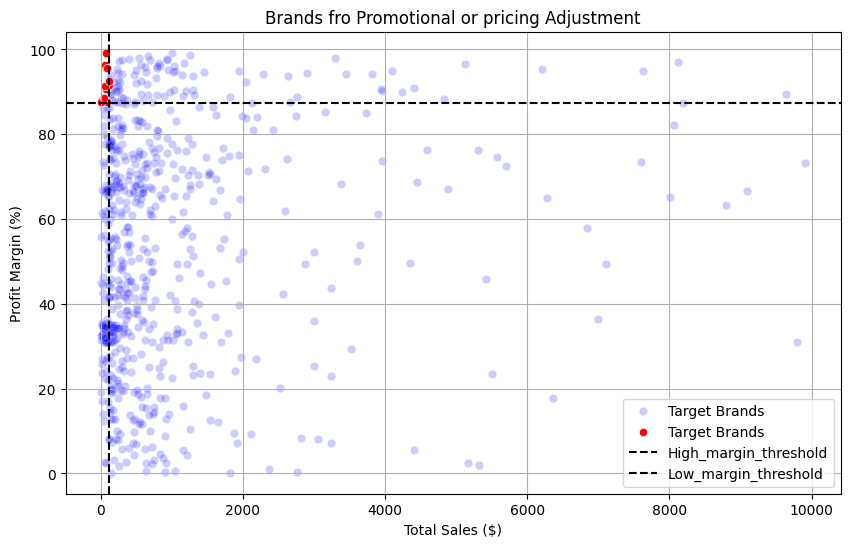

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance , x='TotalSalesDollars' , y='ProfitMargin' , color="blue" , label="Target Brands" , alpha = 0.2)
sns.scatterplot(data=target_brands , x="TotalSalesDollars" , y='ProfitMargin' , color="red" , label="Target Brands")

plt.axhline(high_margin_threshold , linestyle = "--" , color="Black" , label="High_margin_threshold")
plt.axvline(low_sales_threshold , linestyle = "--" , color="Black" , label="Low_margin_threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands fro Promotional or pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()


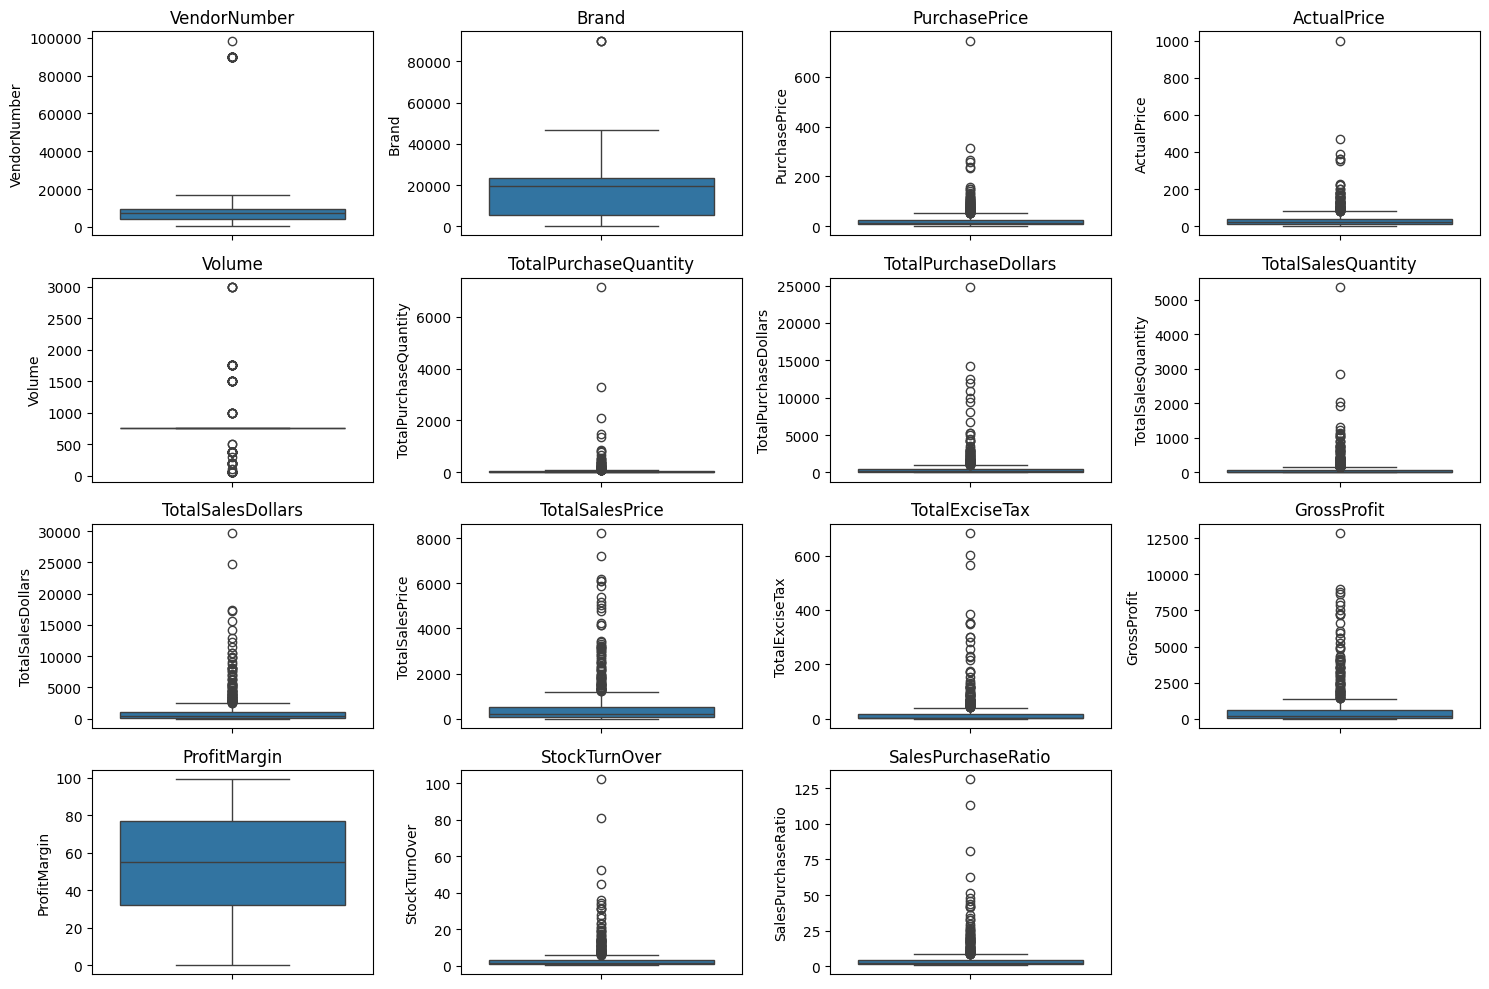

In [31]:
#Outliers ditections with boxPlot
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols) :
    plt.subplot(4,4,i+1) # Adjust Grid Layout As Needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Which vendors and brands demonstrate the highest sales Performance??

In [32]:
def format_dollars(value):
    if value >= 1_000_00:
        return f"{value / 1_000_00:2f}M"
    elif value >= 1_000:
        return f"{value / 1_000_00:2f}K"
    else:
        return str(value)

In [33]:
#Top Vendors and Brands by sales Peformance

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors.apply(lambda x : format_dollars(x))


VendorName
ULTRA BEVERAGE COMPANY LLP    1.322265M
MARTIGNETTI COMPANIES         1.258847M
M S WALKER INC                1.009397M
PERFECTA WINES                0.626869K
BACARDI USA INC               0.490951K
SOUTHERN WINE & SPIRITS NE    0.482486K
STATE WINE & SPIRITS          0.307736K
JIM BEAM BRANDS COMPANY       0.287613K
DIAGEO NORTH AMERICA INC      0.225061K
BROWN-FORMAN CORP             0.205042K
Name: TotalSalesDollars, dtype: object

In [34]:
top_brands.apply(lambda x : format_dollars(x))

Description
Ch La Rousseliere St Estephe    0.296980K
Madison's Ranch Cab Svgn        0.247979K
Bacardi Twin Pack 2/750mls      0.173313K
Paul Dolan 12 Cab Svgn          0.172535K
DiSaronna Amaretto Sour VAP     0.155968K
Pizzolato Pnt Grigio            0.142526K
Robert Hall Cab Svgn            0.129128K
Latour 12 Cuvee Bourg Rouge     0.122739K
Bacardi Superior Rum            0.114114K
Saddleback Clrs 09 Cab Svgn     0.104472K
Name: TotalSalesDollars, dtype: object

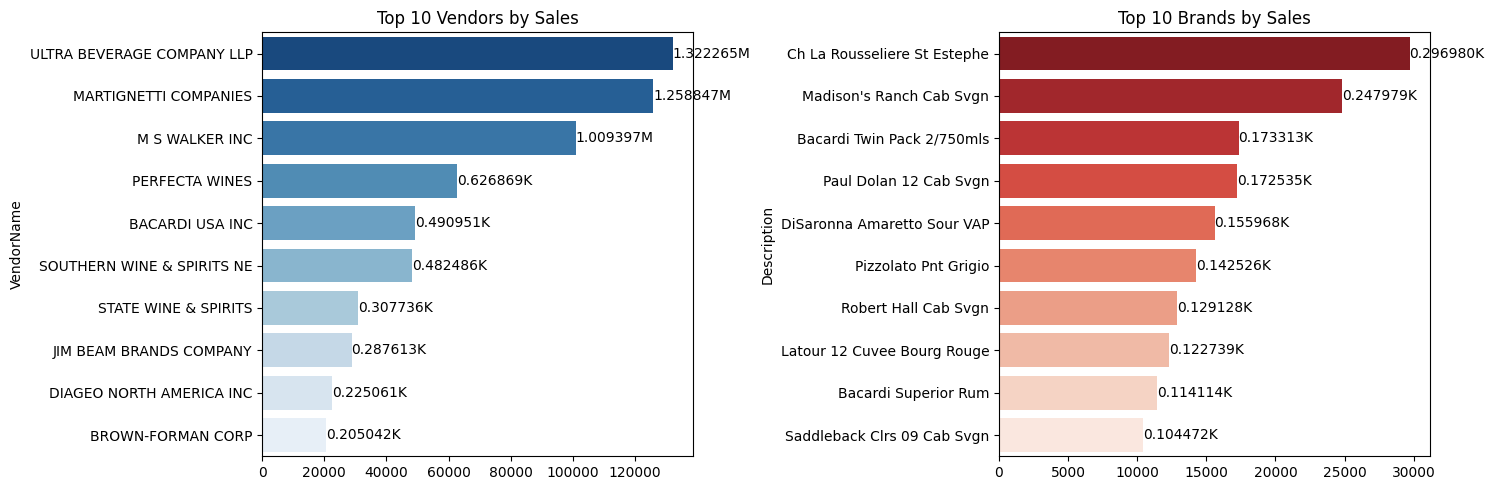

In [35]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Which venndors contribute the most to total purchase dollars??

In [36]:
vendor_Performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_Performance.shape

(64, 4)

In [37]:
vendor_Performance['PurchaseContribution%'] = vendor_Performance['TotalPurchaseDollars']/vendor_Performance['TotalPurchaseDollars'].sum()

In [38]:
vendor_Performance= round(vendor_Performance.sort_values('PurchaseContribution%' , ascending=False),2)

In [39]:
# Display top 10 vendors 

top_vendors = vendor_Performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors



,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
56,ULTRA BEVERAGE COMPANY LLP,0.514928K,0.807337K,1.322265M,0.14
30,MARTIGNETTI COMPANIES,0.493563K,0.765285K,1.258847M,0.13
28,M S WALKER INC,0.484742K,0.524655K,1.009397M,0.13
37,PERFECTA WINES,0.404287K,0.222582K,0.626869K,0.11
2,BACARDI USA INC,0.288294K,0.202657K,0.490951K,0.08
47,SOUTHERN WINE & SPIRITS NE,0.209448K,0.273038K,0.482486K,0.06
24,JIM BEAM BRANDS COMPANY,0.142933K,0.144680K,0.287613K,0.04
13,DIAGEO NORTH AMERICA INC,0.140204K,0.084857K,0.225061K,0.04
48,STATE WINE & SPIRITS,0.116990K,0.190747K,0.307736K,0.03
38,PERNOD RICARD USA,0.107596K,0.095732K,0.203328K,0.03


In [40]:
# top_vendors['PurchaseContribution%'].sum()
float(top_vendors['PurchaseContribution%'].sum())


0.79

In [41]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
56,ULTRA BEVERAGE COMPANY LLP,0.514928K,0.807337K,1.322265M,0.14,0.14
30,MARTIGNETTI COMPANIES,0.493563K,0.765285K,1.258847M,0.13,0.27
28,M S WALKER INC,0.484742K,0.524655K,1.009397M,0.13,0.40
37,PERFECTA WINES,0.404287K,0.222582K,0.626869K,0.11,0.51
2,BACARDI USA INC,0.288294K,0.202657K,0.490951K,0.08,0.59
47,SOUTHERN WINE & SPIRITS NE,0.209448K,0.273038K,0.482486K,0.06,0.65
24,JIM BEAM BRANDS COMPANY,0.142933K,0.144680K,0.287613K,0.04,0.69
13,DIAGEO NORTH AMERICA INC,0.140204K,0.084857K,0.225061K,0.04,0.73
48,STATE WINE & SPIRITS,0.116990K,0.190747K,0.307736K,0.03,0.76
38,PERNOD RICARD USA,0.107596K,0.095732K,0.203328K,0.03,0.79


NameError: name 'VendorName' is not defined

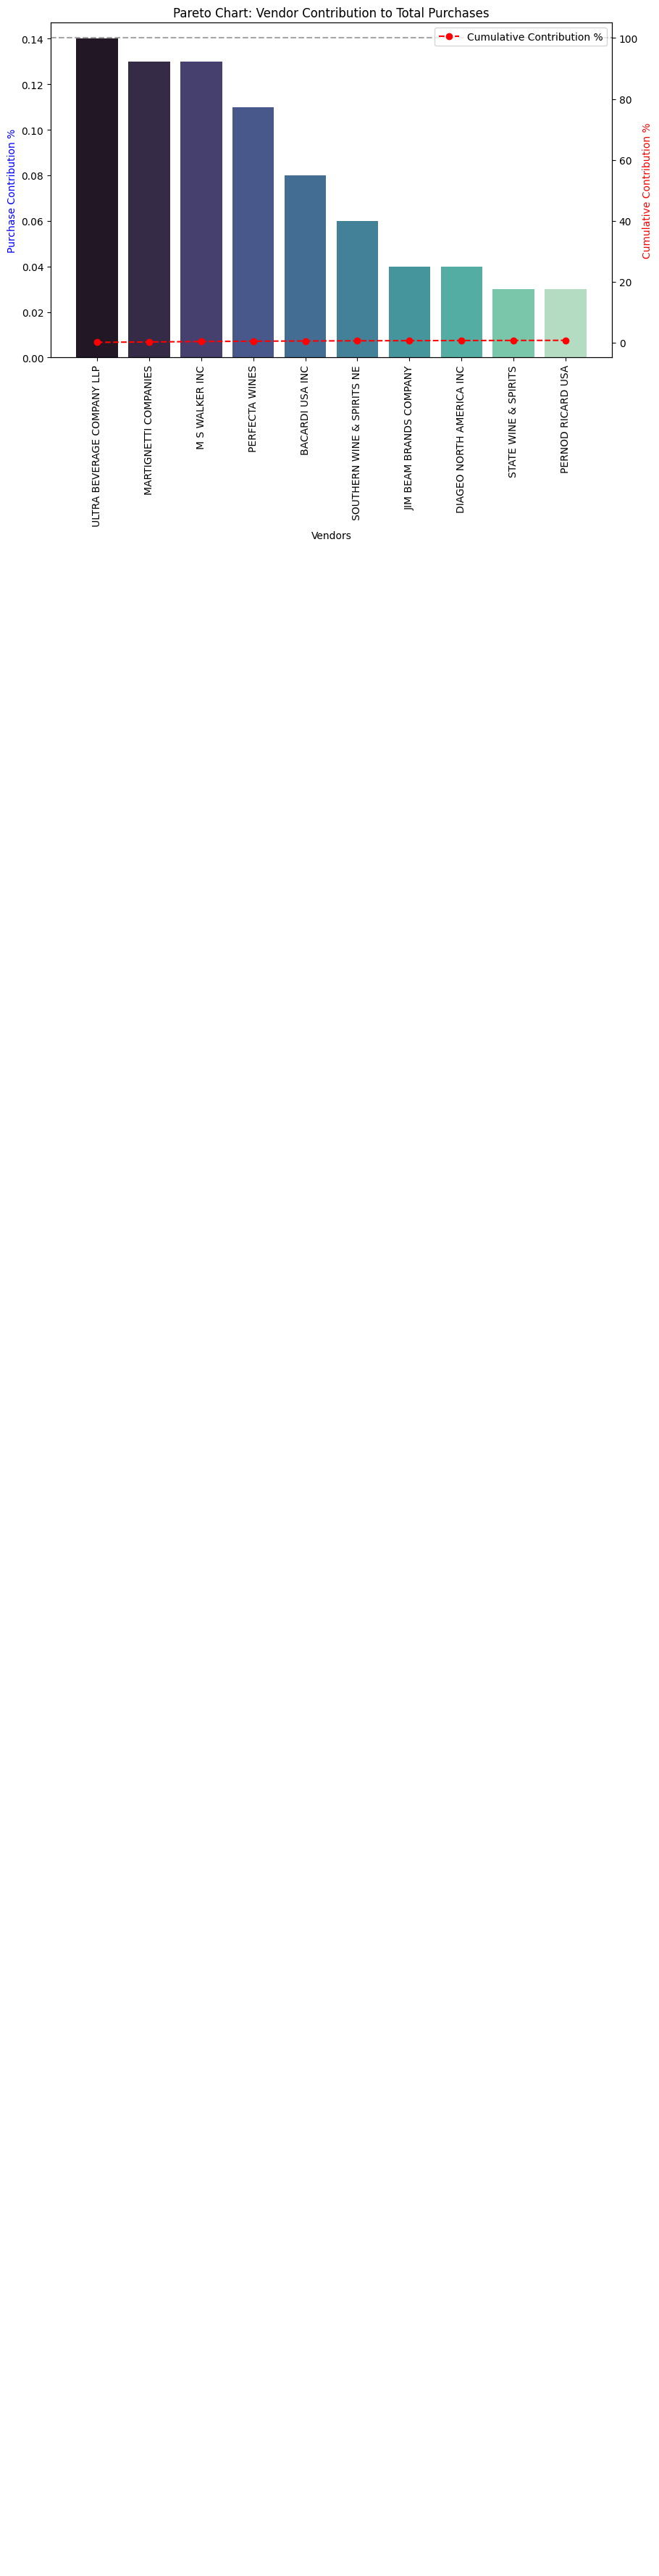

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


How Much of total Procurement is depedent on the top vendors??

In [43]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)} %")


Total Purchase Contribution of top 10 vendors is 0.79 %


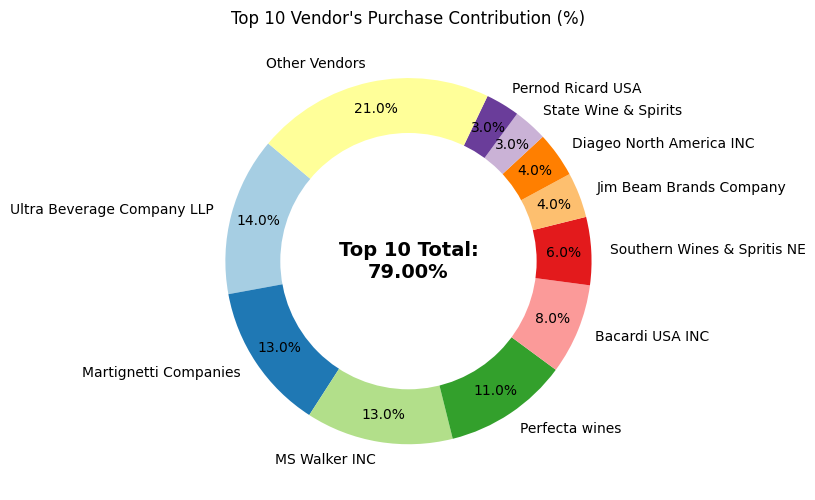

In [48]:
import matplotlib.pyplot as plt

# Example dummy data (replace with your actual top_vendors DataFrame)
top_vendors = {
    'VendorName': ['Ultra Beverage Company LLP', 'Martignetti Companies', 'MS Walker INC', 'Perfecta wines', 'Bacardi USA INC',
                   'Southern Wines & Spritis NE', 'Jim Beam Brands Company', 'Diageo North America INC', 'State Wine & Spirits', 'Pernod Ricard USA'],
    'PurchaseContribution%': [14, 13, 13, 11, 8, 6, 4, 4, 3, 3]
}

import pandas as pd
top_vendors = pd.DataFrame(top_vendors)

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = max(0, 100 - total_contribution)

# Append "Other Vendors"
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Donut center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Center text
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.tight_layout()
plt.show()



Does purchasing in bulk reduce the unit price , and what is the optimal purchse volume for cost saving??

In [106]:
df['UnitPurchasePrice'] = df ['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']


In [112]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseDollars"] , q=3 , labels=["Small" , "Medium" , "Large" ])


In [114]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,14.768811
Medium,26.256432
Large,32.155639


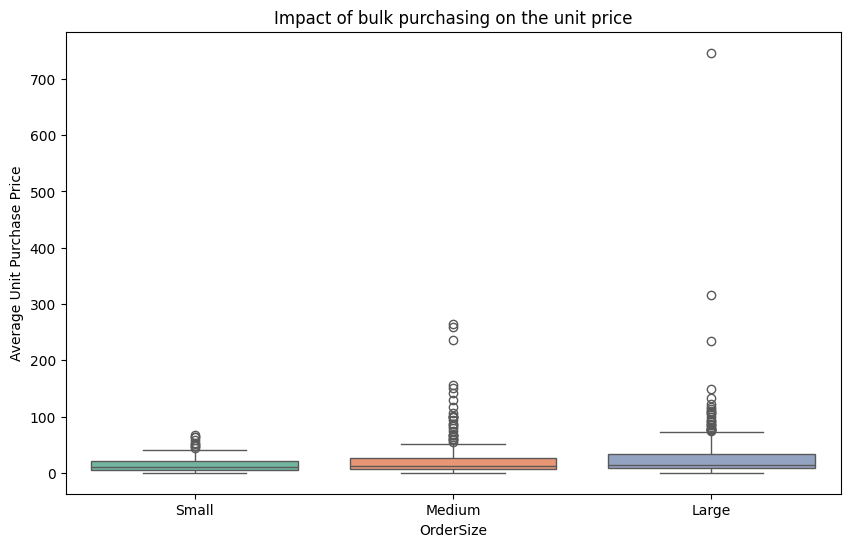

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df , x="OrderSize" , y="UnitPurchasePrice" , palette="Set2")
plt.title("Impact of bulk purchasing on the unit price")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Purchase Price")
plt.show()

I think it is Slightly confusion cause of my data : 
•That if you buy in bulk you get the high prices and if you buy in retail price you ll get the lowest price like 14$.
•The Price diffrence between small and large size orders is substantial.
•This suggest that retail pricing stratergies succssfully encourage vendors to purchase in retail price .

Which vendors have the low inventroy turnover , indicating excess stock and slow - moving products?

In [120]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver' , ascending=True).head(10)

,StockTurnOver
VendorName,
BANFI PRODUCTS CORP,0.650000
HEAVEN HILL DISTILLERIES,0.660000
SURVILLE ENTERPRISES CORP,0.666667
WILLIAM GRANT & SONS INC,0.695652
STATE WINE & SPIRITS,0.707093
VINEXTRA INC,0.716981
SOUTHERN WINE & SPIRITS NE,0.729167
TREASURY WINE ESTATES,0.745798
E & J GALLO WINERY,0.746296


In [121]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print("Total Unsold Capital:" , format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: -192691.53


In [123]:
#AggreGate Capital Locked Per Vendor 

inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors With the Highest Locked Capital :
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue" , ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
54,TREASURY WINE ESTATES,339.94
51,SURVILLE ENTERPRISES CORP,240.72
3,BANFI PRODUCTS CORP,205.41000000000003
35,NICHE W & S,202.94
1,ATLANTIC IMPORTING COMPANY,124.08
57,VINEXTRA INC,112.2
40,POVERTY LANE ORCHARDS,87.41999999999999
16,Dunn Wine Brokers,77.88
53,THE IMPORTED GRAPE LLC,74.48
62,WILLIAM GRANT & SONS INC,34.719999999999985


What is the 95% confidence intervals fro profit margins of top performing and low performing vendors 

In [127]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [129]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= top_threshold]["ProfitMargin"].dropna()

In [130]:
top_vendors

0      16.383314
1      17.317598
2      27.707452
3      51.882961
4      11.616232
         ...    
466    94.593704
482    93.895466
491    98.046101
558    96.916213
635    98.766655
Name: ProfitMargin, Length: 171, dtype: float64

In [131]:
low_vendors

72      0.672530
84      2.567486
85      0.355733
89      3.697135
91     13.978495
         ...    
676    88.107203
677    55.778894
678    96.269133
679    87.688442
680    99.114603
Name: ProfitMargin, Length: 511, dtype: float64

In [132]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (52.73, 61.42), Mean: 57.08
Low Vendors 95% CI: (50.33, 55.04), Mean: 52.68


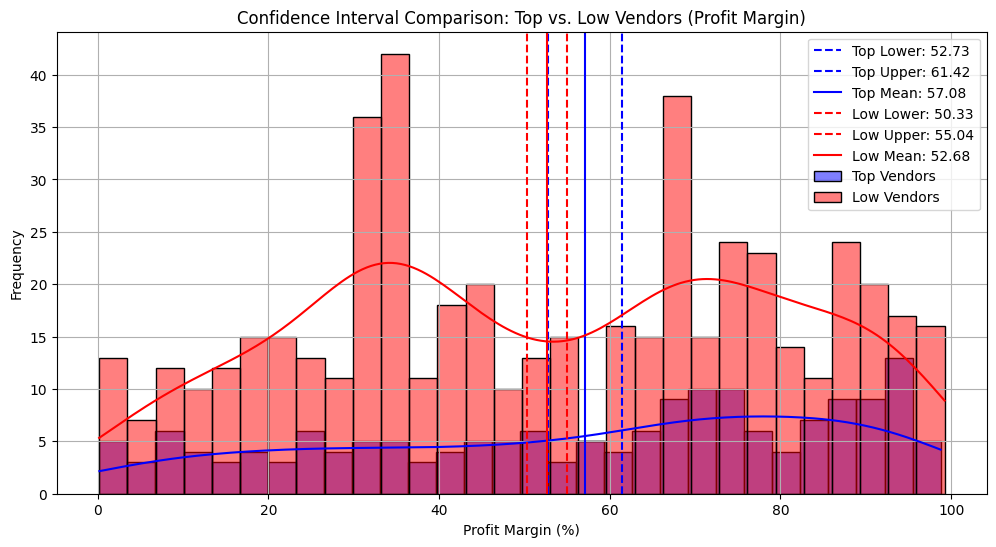

In [133]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

•The confidence interval for low performing vedor (50.33% to 55.04%) is significantaly higher than the top performing vendor (52.73 to 61.42%)
• This suggest theat vendors with lower sales tend to maintain high profit margin , potentially due to premium pricing or lower operational costs .
•For high performance vendors : of they aim to imporve profitablity , they could  explore selective price adjustment , cost optimization , or bundling stratergies.
• For low performin vendors  : Despite higher marghins  , thier loss sale vlumn might indicate a need  for better marketing competitive pricing or improved

Is there a Significant diffrence in profit margis between top_performance and low perfroming vendors

HypoThesis : 
H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [134]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: 2.1882, P-Value: 0.0293
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
